In [220]:
%load_ext autoreload
%autoreload 2
import requests
from lib import MongoHandler, WeatherGetter
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sqlite3
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

In [17]:
get_weather = WeatherGetter()

In [9]:
dates = cur.execute('''SELECT DISTINCT(Date) FROM Matches
WHERE Season like "%2011%"
''').fetchall()

In [10]:
dates

[('2012-03-31',),
 ('2011-12-11',),
 ('2011-08-13',),
 ('2011-11-27',),
 ('2012-02-18',),
 ('2012-01-20',),
 ('2012-02-04',),
 ('2012-04-21',),
 ('2011-09-18',),
 ('2011-10-23',),
 ('2011-10-01',),
 ('2012-03-03',),
 ('2011-08-27',),
 ('2012-03-17',),
 ('2011-11-06',),
 ('2012-05-05',),
 ('2012-04-11',),
 ('2011-12-17',),
 ('2012-02-03',),
 ('2011-10-29',),
 ('2012-01-22',),
 ('2011-12-03',),
 ('2012-04-14',),
 ('2012-03-25',),
 ('2012-03-10',),
 ('2012-04-07',),
 ('2011-11-19',),
 ('2011-10-14',),
 ('2011-09-24',),
 ('2012-04-28',),
 ('2011-12-18',),
 ('2012-03-02',),
 ('2012-03-16',),
 ('2012-02-17',),
 ('2011-08-06',),
 ('2011-11-04',),
 ('2011-09-16',),
 ('2011-07-15',),
 ('2012-05-06',),
 ('2012-02-11',),
 ('2011-10-02',),
 ('2012-03-30',),
 ('2011-10-22',),
 ('2011-08-26',),
 ('2011-08-07',),
 ('2012-02-24',),
 ('2011-07-17',),
 ('2012-02-12',),
 ('2011-08-22',),
 ('2011-09-09',),
 ('2012-04-01',),
 ('2011-09-25',),
 ('2012-04-20',),
 ('2011-11-25',),
 ('2012-03-09',),
 ('2011-11

In [11]:
len(dates)

165

In [14]:
list_of_dates = []
for a_tuple in dates:  # iterates through each tuple
    for item in a_tuple:  # iterates through each tuple items
        list_of_dates.append(item + 'T15:00:00')

In [20]:
list_of_dates

['2012-03-31T15:00:00',
 '2011-12-11T15:00:00',
 '2011-08-13T15:00:00',
 '2011-11-27T15:00:00',
 '2012-02-18T15:00:00',
 '2012-01-20T15:00:00',
 '2012-02-04T15:00:00',
 '2012-04-21T15:00:00',
 '2011-09-18T15:00:00',
 '2011-10-23T15:00:00',
 '2011-10-01T15:00:00',
 '2012-03-03T15:00:00',
 '2011-08-27T15:00:00',
 '2012-03-17T15:00:00',
 '2011-11-06T15:00:00',
 '2012-05-05T15:00:00',
 '2012-04-11T15:00:00',
 '2011-12-17T15:00:00',
 '2012-02-03T15:00:00',
 '2011-10-29T15:00:00',
 '2012-01-22T15:00:00',
 '2011-12-03T15:00:00',
 '2012-04-14T15:00:00',
 '2012-03-25T15:00:00',
 '2012-03-10T15:00:00',
 '2012-04-07T15:00:00',
 '2011-11-19T15:00:00',
 '2011-10-14T15:00:00',
 '2011-09-24T15:00:00',
 '2012-04-28T15:00:00',
 '2011-12-18T15:00:00',
 '2012-03-02T15:00:00',
 '2012-03-16T15:00:00',
 '2012-02-17T15:00:00',
 '2011-08-06T15:00:00',
 '2011-11-04T15:00:00',
 '2011-09-16T15:00:00',
 '2011-07-15T15:00:00',
 '2012-05-06T15:00:00',
 '2012-02-11T15:00:00',
 '2011-10-02T15:00:00',
 '2012-03-30T15:

In [208]:
weather_dicts = {}

for date in list_of_dates:
    call = get_weather.weather_getter(date)
    result = call.json()
    
    weather_dicts[date] = result['currently'].get('icon') if result['currently'].get('icon') else result['currently'].get('summary')
    

weather_dicts

{'2012-03-31T15:00:00': 'partly-cloudy-day',
 '2011-12-11T15:00:00': 'partly-cloudy-day',
 '2011-08-13T15:00:00': 'partly-cloudy-day',
 '2011-11-27T15:00:00': 'partly-cloudy-day',
 '2012-02-18T15:00:00': 'partly-cloudy-day',
 '2012-01-20T15:00:00': 'partly-cloudy-day',
 '2012-02-04T15:00:00': 'clear-day',
 '2012-04-21T15:00:00': 'partly-cloudy-day',
 '2011-09-18T15:00:00': 'partly-cloudy-day',
 '2011-10-23T15:00:00': 'rain',
 '2011-10-01T15:00:00': 'Clear',
 '2012-03-03T15:00:00': 'Clear',
 '2011-08-27T15:00:00': 'partly-cloudy-day',
 '2012-03-17T15:00:00': 'Clear',
 '2011-11-06T15:00:00': 'Clear',
 '2012-05-05T15:00:00': 'partly-cloudy-day',
 '2012-04-11T15:00:00': 'partly-cloudy-day',
 '2011-12-17T15:00:00': 'partly-cloudy-day',
 '2012-02-03T15:00:00': 'partly-cloudy-day',
 '2011-10-29T15:00:00': 'Clear',
 '2012-01-22T15:00:00': 'partly-cloudy-day',
 '2011-12-03T15:00:00': 'rain',
 '2012-04-14T15:00:00': 'partly-cloudy-day',
 '2012-03-25T15:00:00': 'Clear',
 '2012-03-10T15:00:00': 'p

In [74]:
new_weather_dict = {}
for i in weather_dicts:
    new_weather_dict[i[:10]] = weather_dicts[i]

In [75]:
new_weather_dict

{'2012-03-31': 'partly-cloudy-day',
 '2011-12-11': 'partly-cloudy-day',
 '2011-08-13': 'partly-cloudy-day',
 '2011-11-27': 'partly-cloudy-day',
 '2012-02-18': 'partly-cloudy-day',
 '2012-01-20': 'partly-cloudy-day',
 '2012-02-04': 'clear-day',
 '2012-04-21': 'partly-cloudy-day',
 '2011-09-18': 'partly-cloudy-day',
 '2011-10-23': 'rain',
 '2011-10-01': 'Clear',
 '2012-03-03': 'Clear',
 '2011-08-27': 'partly-cloudy-day',
 '2012-03-17': 'Clear',
 '2011-11-06': 'Clear',
 '2012-05-05': 'partly-cloudy-day',
 '2012-04-11': 'partly-cloudy-day',
 '2011-12-17': 'partly-cloudy-day',
 '2012-02-03': 'partly-cloudy-day',
 '2011-10-29': 'Clear',
 '2012-01-22': 'partly-cloudy-day',
 '2011-12-03': 'rain',
 '2012-04-14': 'partly-cloudy-day',
 '2012-03-25': 'Clear',
 '2012-03-10': 'partly-cloudy-day',
 '2012-04-07': 'partly-cloudy-day',
 '2011-11-19': 'Clear',
 '2011-10-14': 'partly-cloudy-day',
 '2011-09-24': 'clear-day',
 '2012-04-28': 'Clear',
 '2011-12-18': 'rain',
 '2012-03-02': 'partly-cloudy-day',

In [42]:
pd.DataFrame.from_records(weather_dicts)

In [44]:
df = pd.DataFrame(cur.execute("""SELECT * FROM Matches
                WHERE Season like '%2011%' """).fetchall())

In [46]:
df.head()
df.columns = [x[0] for x in cur.description]

In [47]:
df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A


In [50]:
df['weather'] =

In [80]:
df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,partly-cloudy-day
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A,partly-cloudy-day
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H,partly-cloudy-day
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H,partly-cloudy-day
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A,partly-cloudy-day


In [77]:
df['weather'] = df['Date'].map(new_weather_dict)

In [79]:
df.weather.value_counts()

partly-cloudy-day    573
Clear                251
clear-day            103
rain                  59
cloudy                 6
Name: weather, dtype: int64

In [81]:
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,partly-cloudy-day
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day


In [83]:
df['weather_dummy'] =  df['weather'].map(lambda x: x['weather'], 1)

TypeError: string indices must be integers

In [118]:
df['played_in_rain'] = [1 if x == 'rain' else 0 for x in df['weather']]

In [119]:
df.loc[df['Div'] == 'E0']

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather,weather_dummy,rain_home,rain_away,played_in_rain


In [112]:
df.drop(df.loc[df['Div'] == 'E0'].index, axis = 0, inplace = True)

In [116]:
df['rain_home'] =np.where(np.logical_and(df['FTR']=='H',df['weather']=='rain'),1,0)


In [117]:
df['rain_away'] =np.where(np.logical_and(df['FTR']=='H',df['weather']=='rain'),1,0)


In [120]:
df['home_win'] =[1 if x == 'H' else 0 for x in df['FTR']]


In [121]:
df['away_win'] =[1 if x == 'A' else 0 for x in df['FTR']]


In [122]:
df['draw'] =[1 if x == 'D' else 0 for x in df['FTR']]


In [123]:
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather,weather_dummy,rain_home,rain_away,played_in_rain,home_win,away_win,draw
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,partly-cloudy-day,0,0,0,0,0,1,0
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day,0,0,0,0,0,1,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day,0,0,0,0,0,1,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day,0,0,0,0,1,0,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day,0,0,0,0,0,0,1


In [138]:
Nurnber_home_df = df.loc[df['HomeTeam'] == 'Nurnberg']

In [157]:
Nurnbefr_home_df = Nurnber_home_df.append(Nurnber_home_df.sum().rename('Total'))

In [159]:
Nurnbefr_home_df.iloc[-1]

Match_ID                                                      22710
Div                              D1D1D1D1D1D1D1D1D1D1D1D1D1D1D1D1D1
Season                                                        34187
Date              2012-03-312012-02-032012-02-182011-11-052012-0...
HomeTeam          NurnbergNurnbergNurnbergNurnbergNurnbergNurnbe...
AwayTeam          Bayern MunichDortmundFC KolnFreiburgHamburgKai...
FTHG                                                             22
FTAG                                                             25
FTR                                               AAHADHAHDDAHDAHHA
weather           partly-cloudy-daypartly-cloudy-daypartly-cloud...
weather_dummy                                                     0
rain_home                                                         0
rain_away                                                         0
played_in_rain                                                    0
home_win                                        

In [160]:
Nurnbefr_home_df.iloc[-1]['home_win']

6

In [324]:
list_of_teams = list(df.HomeTeam.unique())

In [325]:
new_list = []

cols = ['team_name', 'total_goals', 'total_wins']



for team in list_of_teams:
    team_list = []
    
    home_df = df.loc[df['HomeTeam'] == team]
    home_df = home_df.append(home_df.sum().rename('Total'))
    home_goals = home_df.iloc[-1]['FTHG']
    home_rain_wins = home_df.iloc[-1]['rain_home']
    home_rain_played = home_df.iloc[-1]['played_in_rain']
    home_wins = home_df.iloc[-1]['home_win']
    home_team_list.append(home_df.iloc[-1]['away_win'])
    home_team_list.append(home_df.iloc[-1]['draw'])
    home_played = len(home_df) - 1
    
    
    away_team_list = []
    away_df = df.loc[df['AwayTeam'] == team]
    away_df = away_df.append(away_df.sum().rename('Total'))
    away_goals = away_df.iloc[-1]['FTAG']
    away_rain_wins = away_df.iloc[-1]['rain_away']
    away_rain_played = away_df.iloc[-1]['played_in_rain']
    away_team_list.append(away_df.iloc[-1]['home_win'])
    away_wins = away_df.iloc[-1]['away_win']
    away_team_list.append(away_df.iloc[-1]['draw'])
    away_played = (len(away_df)-1)
    
    total_goals = home_goals + away_goals
    total_wins = home_wins + away_wins

    wins_in_rain = home_rain_wins + away_rain_wins
    played_in_rain = home_rain_played + away_rain_played 
    if played_in_rain == 0:
        win_percentage = 0
    else:
        win_percentage = (wins_in_rain/played_in_rain)
    
    total_played = (home_played + away_played)


    
#     print(home_rain_wins)
#     print(away_rain_wins)
#     print(home_rain_played)
#     print(away_rain_played)
#     print(total_played)
    
    team_list.append(team)
    team_list.append(total_goals)
    team_list.append(total_wins)
#     team_list.append(win_percentage)
    
    new_list.append(team_list)
    
    df1 = pd.DataFrame(new_list, columns=cols)
    
  
#     ax = fig.add_subplot(1, 4, 1 + iteration)
    
#     ax.plot.bar(['home_wins', 'away_wins'], [new_list[iteration][1], new_list[iteration][2]])
#     ax.plot.title(team)
    
#     iteration += 1
    
#     plt.show()

    

    





In [326]:
df1

,team_name,total_goals,total_wins
0,Nurnberg,38,12
1,Stuttgart,63,15
2,Wolfsburg,47,13
3,Mainz,47,9
4,Freiburg,45,10
5,M'gladbach,49,17
6,Hamburg,35,8
7,Werder Bremen,49,11
8,Schalke 04,74,20
9,Hannover,41,12


In [344]:
index = df1['team_name']
df1.plot.barh(figsize = (15,15), x = index, y = df1[])

KeyError: "None of [Index(['Nurnberg', 'Stuttgart', 'Wolfsburg', 'Mainz', 'Freiburg', 'M'gladbach',\n       'Hamburg', 'Werder Bremen', 'Schalke 04', 'Hannover', 'Hoffenheim',\n       'Leverkusen', 'Kaiserslautern', 'Hertha', 'Augsburg', 'FC Koln',\n       'Dortmund', 'Bayern Munich', 'Hansa Rostock', 'Bochum', 'Ein Frankfurt',\n       'Paderborn', 'Greuther Furth', 'Fortuna Dusseldorf', 'Ingolstadt',\n       'Cottbus', 'St Pauli', 'Frankfurt FSV', 'Union Berlin', 'Munich 1860',\n       'Aachen', 'Karlsruhe', 'Braunschweig', 'Erzgebirge Aue', 'Duisburg',\n       'Dresden'],\n      dtype='object')] are in the [columns]"

In [355]:
df1.head()

,team_name,total_goals,total_wins
0,Nurnberg,38,12
1,Stuttgart,63,15
2,Wolfsburg,47,13
3,Mainz,47,9
4,Freiburg,45,10


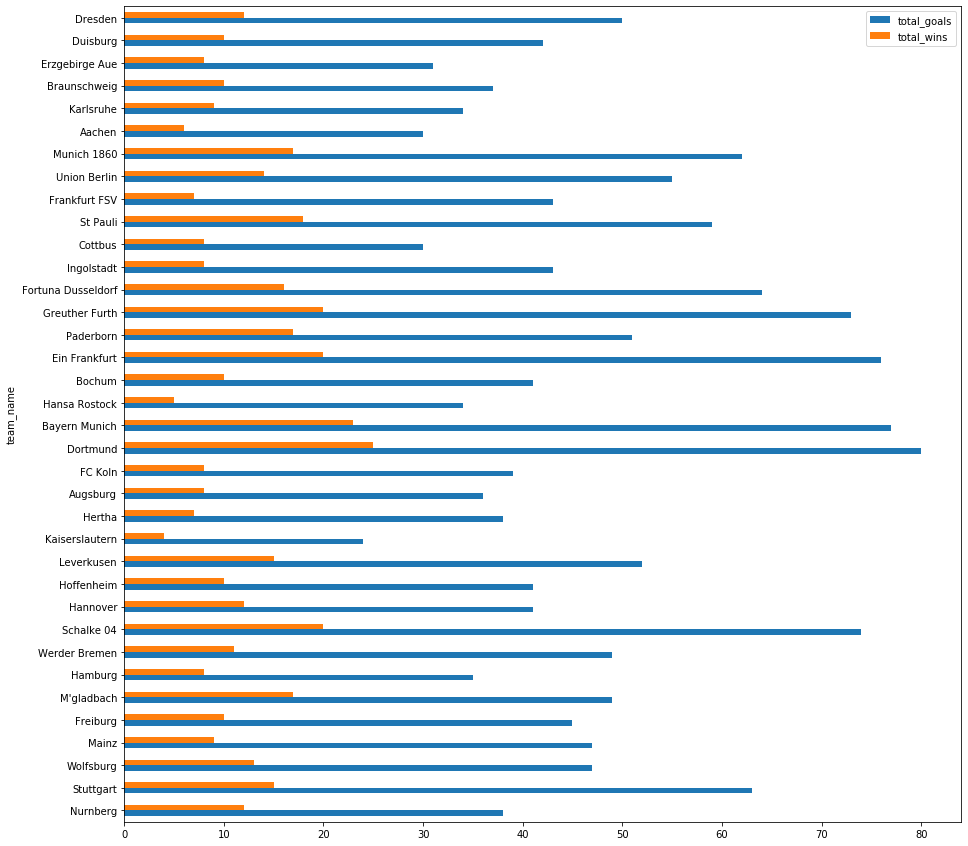

In [373]:
>>> goals =df1['total_goals']
>>> wins = df1 ['total_wins']
>>> index = df1['team_name']

>>> ax = df1.plot.barh(figsize = (15,15), x = 'team_name')